In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("/content/sales_data_sample.csv", encoding="ISO-8859-1")

# Exploratory Data Analysis

In [ ]:
data.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
describe = data.describe()
describe

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
#Checking NaN Variables
nan_check = pd.isnull(data).sum()
nan_check

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
#ADDRESSLINE2, STATE, POSTALCODE, TERRITORY have NaN

null_variables = data.isnull().sum().sort_values(ascending = False)
null_rates = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_variables,null_rates],axis = 1,keys=['N of null','Rates'])

In [ ]:
missing_data

,N of null,Rates
ADDRESSLINE2,2521,0.893022
STATE,1486,0.526390
TERRITORY,1074,0.380446
POSTALCODE,76,0.026922
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
COUNTRY,0,0.000000
CITY,0,0.000000


# Data preprocessing

In [ ]:
#ADDRESSLINE2, STATE, TERRITORY rates are too much to handle missing values

data = data.drop(["ADDRESSLINE2","STATE","TERRITORY"], axis=1)

#PHONE, ADRESSLINE1, POSTALCODE columns are significant

data= data.drop(["PHONE","ADDRESSLINE1","POSTALCODE"],axis=1)

# drop 'ORDERDATE' because we have YEAR ID, MONTH ID
data= data.drop(["ORDERDATE"],axis=1)

#drop 'STATUS', 'POSTALCODE', 'CITY',
#'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER'
#They are not required for analysis
drops = ['STATUS', 'CITY','CONTACTFIRSTNAME',
         'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
data= data.drop(drops,axis=1)

data.head(6)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
5,36,96.66,1,3479.76,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [ ]:
#Encoding categorical features

from sklearn.preprocessing import LabelEncoder, StandardScaler
labelencoder = LabelEncoder()
data.loc[:, 'PRODUCTLINE'] = labelencoder.fit_transform(data.loc[:, 'PRODUCTLINE'])
data['COUNTRY'] = labelencoder.fit_transform(data['COUNTRY'])
data['DEALSIZE'] = labelencoder.fit_transform(data['DEALSIZE'])
data['PRODUCTCODE'] = labelencoder.fit_transform(data['PRODUCTCODE'])

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


scaled_data.head(5)

<ipython-input-25-d37fe0b65ba3>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'PRODUCTLINE'] = labelencoder.fit_transform(data.loc[:, 'PRODUCTLINE'])


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,-0.522891,0.596978,-1.057059,-0.370825,-1.427039,-1.392909,-1.16517,-0.628331,-0.142246,-1.70278,0.967889,1.015353
1,-0.112201,-0.114450,-0.347015,-0.427897,-0.596243,-0.572337,-1.16517,-0.628331,-0.142246,-1.70278,-0.977421,1.015353
2,0.606505,0.549384,-1.057059,0.179443,0.234553,-0.025289,-1.16517,-0.628331,-0.142246,-1.70278,-0.977421,-0.672716
3,1.017195,-0.019759,-0.110334,0.104701,0.234553,0.248235,-1.16517,-0.628331,-0.142246,-1.70278,0.967889,-0.672716
4,1.427884,0.810158,1.783116,0.896740,1.065350,0.795284,-1.16517,-0.628331,-0.142246,-1.70278,0.967889,-0.672716


<Figure size 1200x800 with 0 Axes>

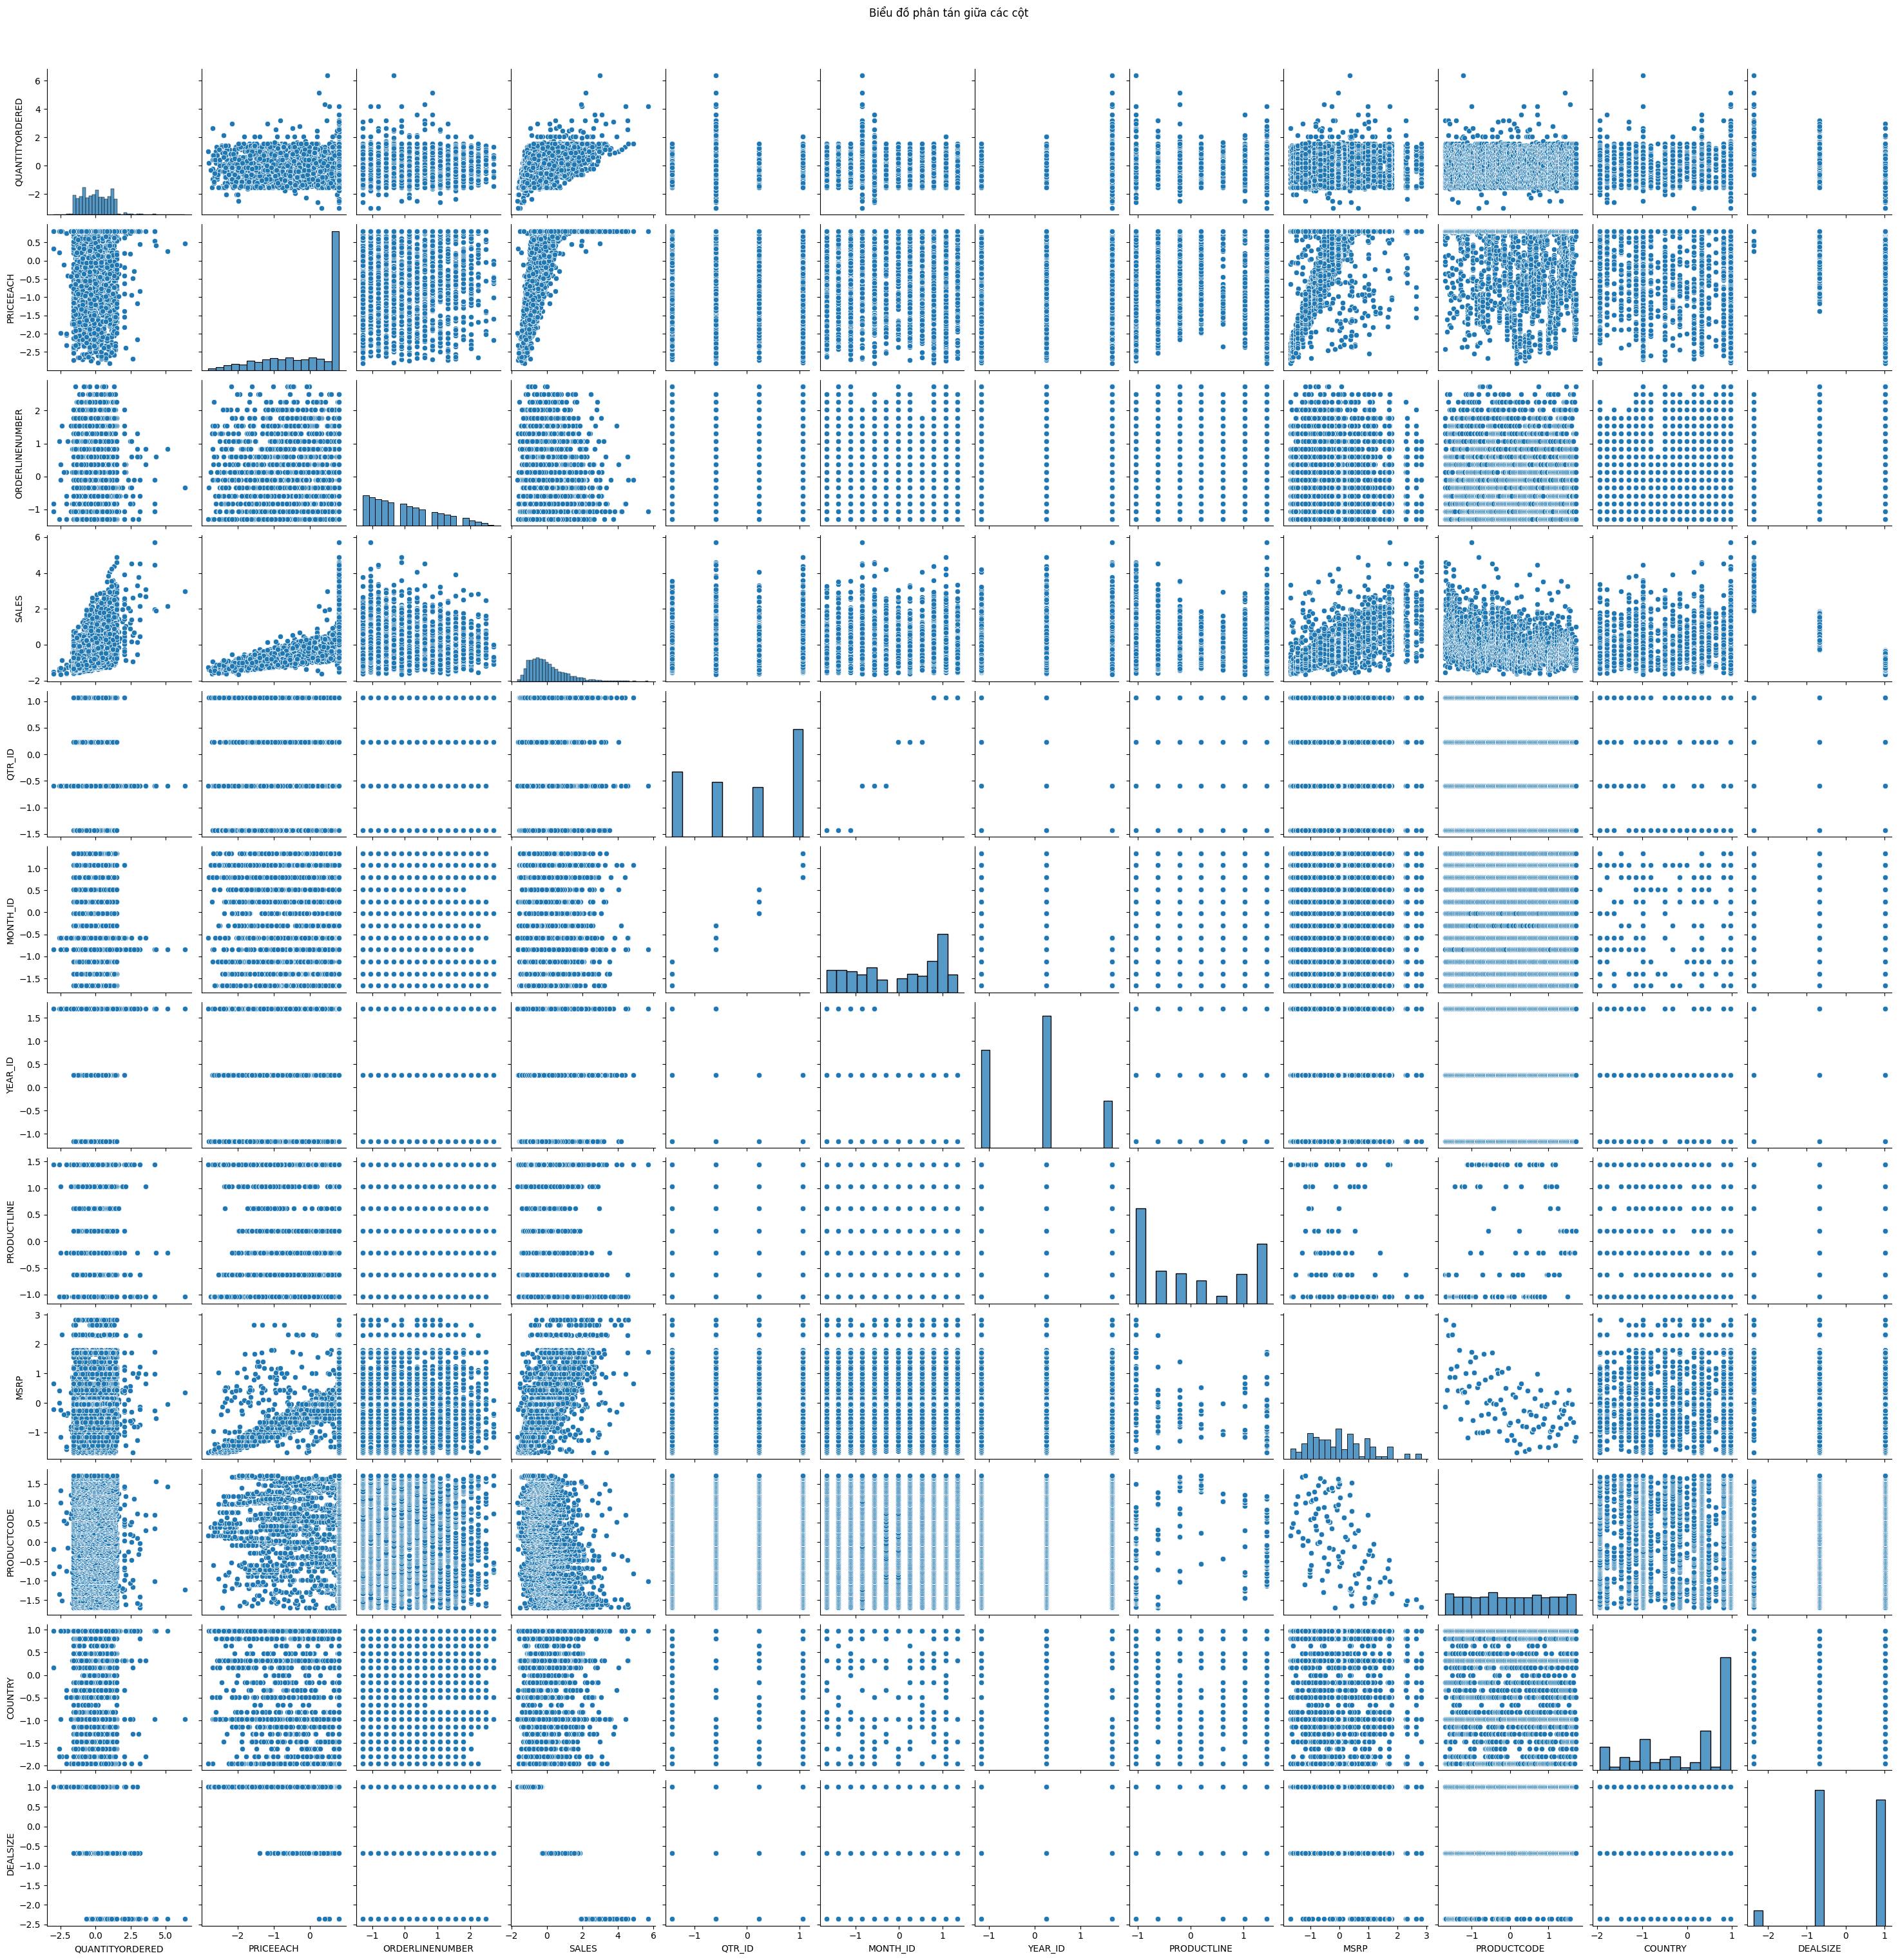

In [ ]:
# Vẽ biểu đồ phân tán giữa các cột
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.pairplot(scaled_data)
plt.suptitle('Biểu đồ phân tán giữa các cột', y=1.02)
plt.show()

In [ ]:
import plotly.express as px

# Tên của biểu đồ
chart_title = "Biểu Đồ Tương quan đơn đặt hàng giữa các quốc gia"
# Tên của trục x và trục y
x_axis_label = "Quốc Gia"
y_axis_label = "Số Lượng"
x = "COUNTRY"
fig = plt.Figure(figsize = (12, 6))
fig = px.bar(x = scaled_data[x].value_counts().index, y = scaled_data[x].value_counts(), color = scaled_data["COUNTRY"].value_counts().index, height = 600)

fig.update_layout(title_text=chart_title, title_x=0.5)

fig.update_layout(xaxis_title=x_axis_label, yaxis_title=y_axis_label)
fig.show()

<ipython-input-9-d1f797c85a1b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




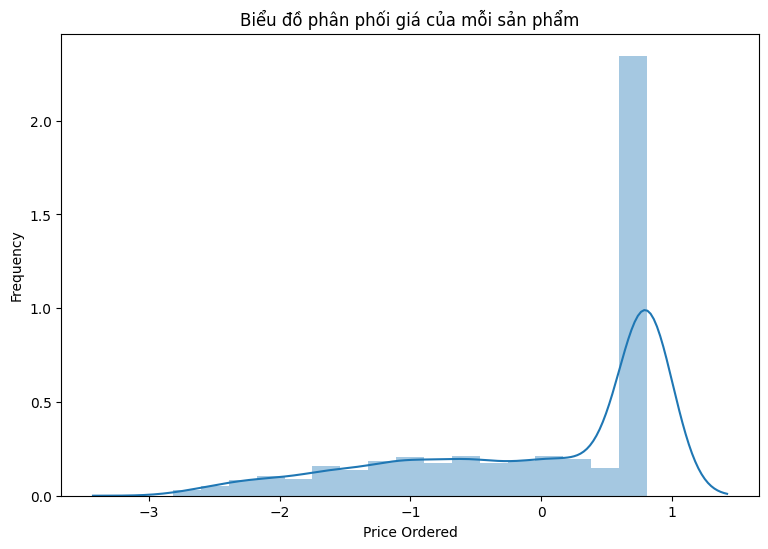

In [ ]:
plt.figure(figsize=(9,6))
sns.distplot(scaled_data['PRICEEACH'])
plt.title('Biểu đồ phân phối giá của mỗi sản phẩm')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

<ipython-input-10-4b77f2e80a87>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




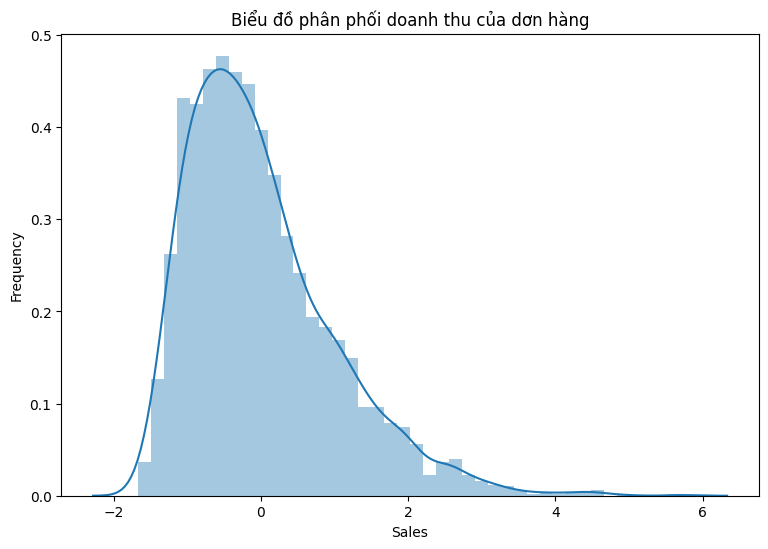

In [ ]:
plt.figure(figsize=(9,6))
sns.distplot(scaled_data['SALES'])
plt.title('Biểu đồ phân phối doanh thu của dơn hàng')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

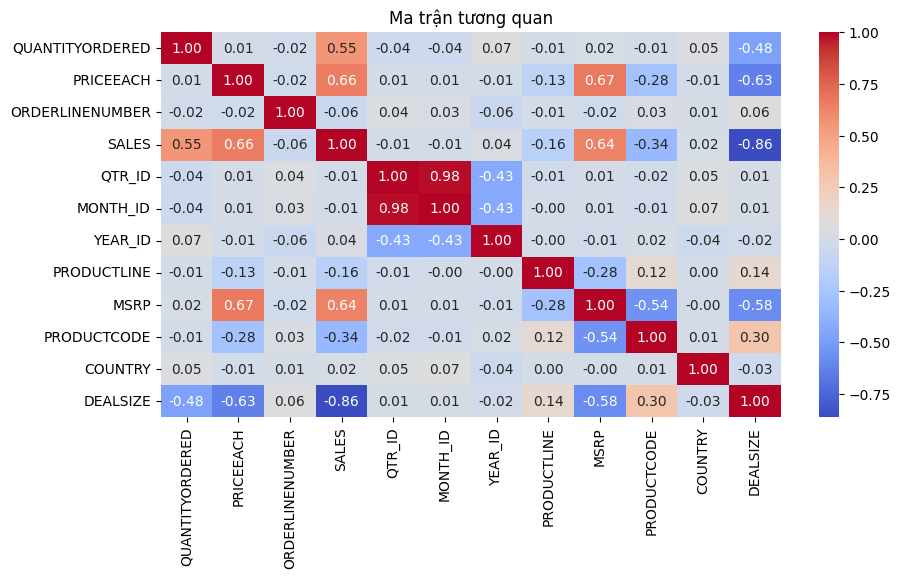

In [ ]:
# Tính ma trận tương quan
correlation_matrix = scaled_data.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan')
plt.show()

In [ ]:
# Tính ma trận tương quan
correlation_matrix = scaled_data.corr()

# Giới hạn giá trị tương quan
threshold = 0.9
highly_correlated_columns = set()

# Lặp qua ma trận tương quan và chọn các cột có giá trị tương quan cao
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

# Loại bỏ các cột có tương quan cao với nhau
df_selected = scaled_data.drop(columns=highly_correlated_columns)

# In các cột được chọn
print("Các cột được chọn:")
print(df_selected.columns)


Các cột được chọn:
Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID',
       'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')


In [ ]:
# Xóa các cột không được chọn khỏi DataFrame gốc
scaled_data = scaled_data.drop(columns=set(scaled_data.columns) - set(df_selected.columns))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

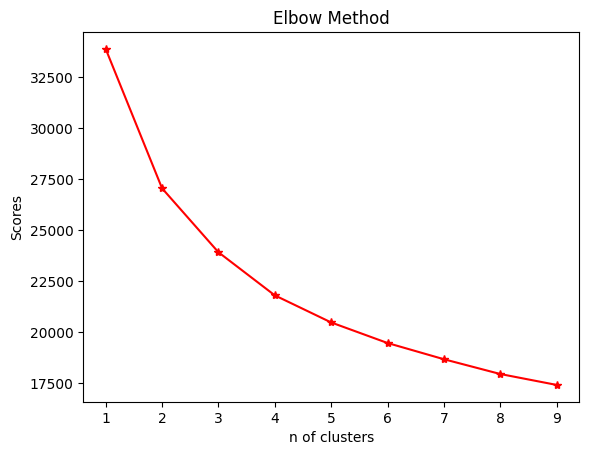

In [ ]:
#Finding optimal number of clusters
from sklearn.cluster import KMeans

scores_1 = []

range_of_cluster = range(1,10)

for i in range_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'r*-')
plt.xticks(np.arange(len(scores_1)), np.arange(1, len(scores_1) +1) )
plt.title('Elbow Method')
plt.xlabel('n of clusters')
plt.ylabel('Scores')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

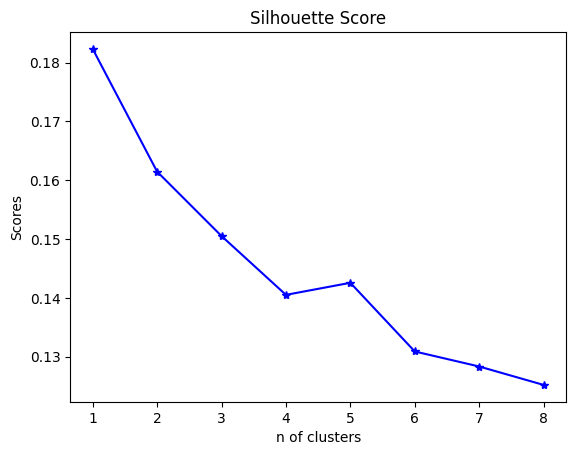

In [ ]:
#Silhouette Score
from sklearn.metrics import silhouette_score
scores = []
for num_clusters in range(2,10):
    clusterer = KMeans(n_clusters=num_clusters)
    pred = clusterer.fit_predict(scaled_data)
    # centers = clusterer.cluster_centers_
    scores.append(silhouette_score(scaled_data, pred, metric='euclidean'))

plt.plot(scores, 'b*-')
plt.xticks(np.arange(len(scores)), np.arange(1, len(scores) +1) )
plt.title('Silhouette Score')
plt.xlabel('n of clusters')
plt.ylabel('Scores')
plt.show()

# Training model

In [ ]:
# I selected number of clusters as 5. (n = 5)

kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(scaled_data)

clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[scaled_data.columns])
y_kmeans = kmeans.fit_predict(scaled_data)

data_with_cluster = pd.concat([data, pd.DataFrame({'CLUSTER': kmeans.labels_})], axis=1)
data_with_cluster.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE,CLUSTER
0,30,95.70,2,2871.00,1,2,2003,1,95,0,18,2,2
1,34,81.35,5,2765.90,2,5,2003,1,95,0,6,2,2
2,41,94.74,2,3884.34,3,7,2003,1,95,0,6,1,0
3,45,83.26,6,3746.70,3,8,2003,1,95,0,18,1,0
4,49,100.00,14,5205.27,4,10,2003,1,95,0,18,1,0
5,36,96.66,1,3479.76,4,10,2003,1,95,0,18,1,0
6,29,86.13,9,2497.77,4,11,2003,1,95,0,6,2,3
7,48,100.00,1,5512.32,4,11,2003,1,95,0,11,1,0
8,22,98.57,2,2168.54,4,12,2003,1,95,0,18,2,3
9,41,100.00,14,4708.44,1,1,2004,1,95,0,6,1,1


In [ ]:
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1404403123427612


In [ ]:
# Tính toán Inertia (intra-cluster distance)
inertia = kmeans.inertia_
print("Inertia (Intra-cluster distance of 5 cluster):", inertia)

# Tính toán Inter-cluster distances
cluster_centers = kmeans.cluster_centers_
inter_cluster_distances = []
for i in range(len(cluster_centers)):
    for j in range(i + 1, len(cluster_centers)):
        distance = np.linalg.norm(cluster_centers[i] - cluster_centers[j])  # Khoảng cách Euclidean giữa các trung tâm cụm
        inter_cluster_distances.append(distance)

avg_inter_cluster_distance = np.mean(inter_cluster_distances)
print("Average Inter-cluster distance of 5 cluster:", avg_inter_cluster_distance)
data_with_cluster.head(10)

Inertia (Intra-cluster distance of 5 cluster): 20481.935399036385
Average Inter-cluster distance of 5 cluster: 3.3838588474999964


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE,CLUSTER
0,30,95.70,2,2871.00,1,2,2003,1,95,0,18,2,2
1,34,81.35,5,2765.90,2,5,2003,1,95,0,6,2,2
2,41,94.74,2,3884.34,3,7,2003,1,95,0,6,1,0
3,45,83.26,6,3746.70,3,8,2003,1,95,0,18,1,0
4,49,100.00,14,5205.27,4,10,2003,1,95,0,18,1,0
5,36,96.66,1,3479.76,4,10,2003,1,95,0,18,1,0
6,29,86.13,9,2497.77,4,11,2003,1,95,0,6,2,3
7,48,100.00,1,5512.32,4,11,2003,1,95,0,11,1,0
8,22,98.57,2,2168.54,4,12,2003,1,95,0,18,2,3
9,41,100.00,14,4708.44,1,1,2004,1,95,0,6,1,1


In [ ]:
#Dimension Reduce
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_comp, columns=['pca_1', 'pca_2', 'pca_3'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

#Showing
import plotly.express as px
fig = px.scatter_3d(pca_df, x='pca_1', y='pca_2', z='pca_3',
                    color='cluster', symbol='cluster', size_max=20, opacity=0.6)
fig.show()

# Save Model

In [ ]:
import joblib
joblib.dump(kmeans, '/content/kmeans_model.joblib')

['/content/kmeans_model.joblib']